In [82]:
"""
Created 30/10/2022

@author: Mithrandir - Şaban Kara
"""

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

In [48]:
def my_softmax(z):  
    
    ez = np.exp(z)
    a = ez/np.sum(ez)

    return a

In [49]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)

print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]


In [75]:
# softmax = tf.exp(np.array([1., 2., 3., 4.])) / tf.reduce_sum(tf.exp(np.array([1., 2., 3., 4.])), keepdims=True)

# z = np.array([1., 2., 3., 4.])
# a = my_softmax(z)
# atf = tf.nn.softmax(z)

# print(f"my_softmax(z):         {a}")
# print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]


In [51]:
# load dataset
X = np.load("data/X.npy")
y = np.load("data/y.npy")

print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

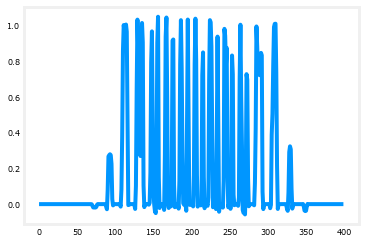

In [72]:
plt.plot(X[0])
plt.show()

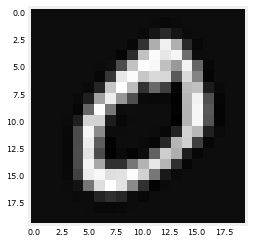

In [73]:
X_0 = X[0].reshape((20,20)).T
plt.imshow(X_0, cmap='gray')
plt.show()

In [58]:
print ('The shape of X is: ', (X.shape))
print ('The shape of y is: ', (y.shape))

The shape of X is:  (5000, 400)
The shape of y is:  (5000, 1)


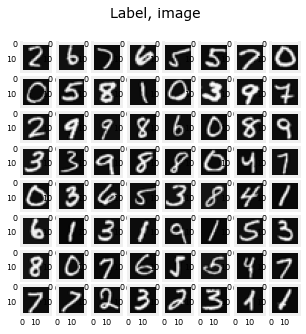

In [74]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    fig.suptitle("Label, image", fontsize=14)

In [76]:
# Sequential model
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        tf.keras.layers.InputLayer((400,)),
        tf.keras.layers.Dense(25, activation="relu", name="L1"),
        tf.keras.layers.Dense(15, activation="relu", name="L2"),
        tf.keras.layers.Dense(10, activation="linear", name="L3")   
    ], name = "my_model" 
)

model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [77]:
[layer1, layer2, layer3] = model.layers #L!, L2, L3

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [78]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            )

history = model.fit(X, y, epochs=40)

Epoch 1/40
157/157 [==============================] - 1s 2ms/step - loss: 1.4811
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.5519
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3948
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3333
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3020
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2745
Epoch 7/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2508
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2332
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2192
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2019
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1904
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1798
Epoch 13/40
157/157 [====

In [98]:
print(history.history)
print(history.history.keys())

{'loss': [1.4811416864395142, 0.5519488453865051, 0.3947629928588867, 0.3332863450050354, 0.30204862356185913, 0.27448034286499023, 0.25080952048301697, 0.2332076132297516, 0.21917720139026642, 0.20194905996322632, 0.19037392735481262, 0.1797657012939453, 0.17043034732341766, 0.15921570360660553, 0.149725079536438, 0.14263823628425598, 0.1352582573890686, 0.129837304353714, 0.11948920041322708, 0.11508949100971222, 0.11011442542076111, 0.10649405419826508, 0.1018611341714859, 0.09482236951589584, 0.09241747111082077, 0.08696281909942627, 0.08293656259775162, 0.07772687822580338, 0.0740559920668602, 0.07150642573833466, 0.0666780024766922, 0.06439371407032013, 0.06009054556488991, 0.05767103284597397, 0.055588334798812866, 0.05517870560288429, 0.050417665392160416, 0.04749039188027382, 0.0450039878487587, 0.0416727289557457]}
dict_keys(['loss'])


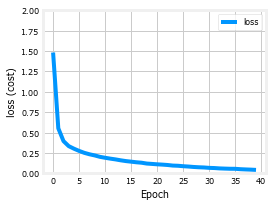

In [117]:
fig,ax = plt.subplots(1,1, figsize = (4,3))

ax.plot(history.history['loss'], label='loss')

ax.set_ylim([0, 2])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss (cost)')
ax.legend()
ax.grid(True)

plt.show()

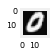

1/1 [==============================] - 0s 20ms/step
 predicting a Two: 
[[ 14.27 -34.29   6.47  -6.01 -20.38  -5.23  -4.04 -11.43   0.24  -5.64]]
 Largest Prediction index: 0


In [107]:
image_of_two = X[115].reshape(1,400)

display_digit(image_of_two)

prediction = model.predict(image_of_two)  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

In [109]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[1.00e+00 8.12e-22 4.10e-04 1.56e-09 8.90e-16 3.39e-09 1.12e-08 6.93e-12
  8.09e-07 2.25e-09]]
Total of predictions: 1.000


1/1 [==============================] - 0s 18ms/step


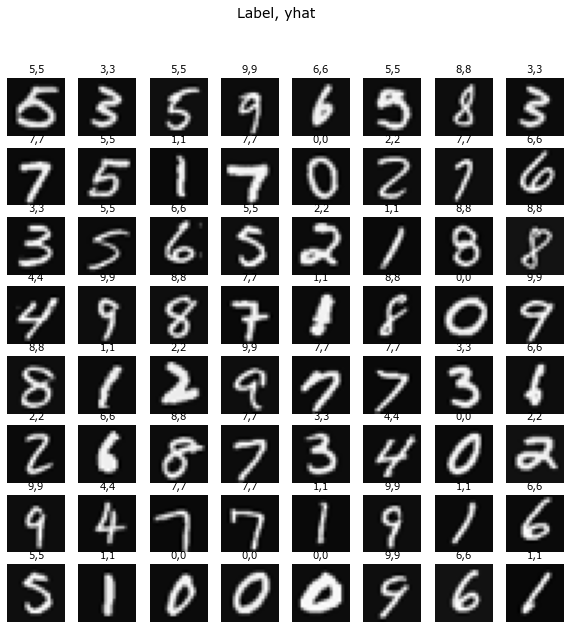

In [110]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(10,10))

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

1/1 [==============================] - 0s 18ms/step
42 errors out of 5000 images


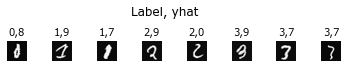

In [111]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")